In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

def build_model(conv_layers=2, filters=[32, 64], kernel_size=3, pooling='max'):
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))

    for i in range(conv_layers):
        conv_name = f'conv{i+1}'
        pool_name = f'pool{i+1}'

        model.add(Conv2D(filters[i], (kernel_size, kernel_size), activation='relu', padding='same', name=conv_name))

        if pooling == 'max':
            model.add(MaxPooling2D(pool_size=(2, 2), name=pool_name))
        elif pooling == 'avg':
            model.add(AveragePooling2D(pool_size=(2, 2), name=pool_name))

    model.add(Flatten(name='flatten'))
    model.add(Dense(64, activation='relu', name='dense1'))
    model.add(Dense(10, activation='softmax', name='output'))

    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

def train_and_evaluate(model, epochs=3):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
    y_pred = model.predict(x_test).argmax(axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')
    return history, f1

def plot_loss(histories, labels, title):
    plt.figure(figsize=(10,6))
    for h, label in zip(histories, labels):
        plt.plot(h.history['loss'], linestyle='--', label=f'{label} train_loss')
        plt.plot(h.history['val_loss'], label=f'{label} val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


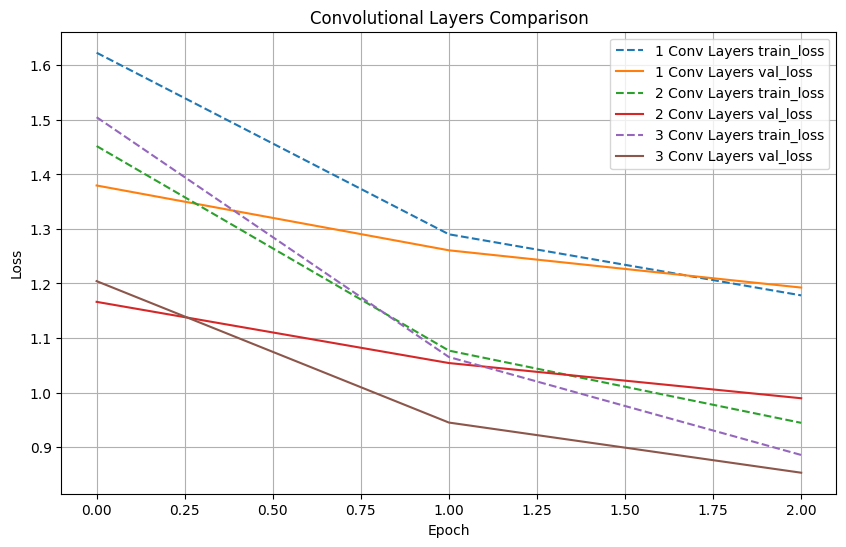

F1 Scores for Conv Layers: {1: 0.5852450705781382, 2: 0.6640945888914986, 3: 0.7006708560579614}


In [50]:
layer_variants = [1, 2, 3]
histories_layers, f1_layers = [], []

for layers in layer_variants:
    model = build_model(conv_layers=layers, filters=[32, 64, 128])
    history, f1 = train_and_evaluate(model)
    histories_layers.append(history)
    f1_layers.append(f1)
    model.save(f'cnn_conv_layers_{layers}.h5')

plot_loss(histories_layers, [f"{l} Conv Layers" for l in layer_variants], "Convolutional Layers Comparison")
print("F1 Scores for Conv Layers:", dict(zip(layer_variants, f1_layers)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


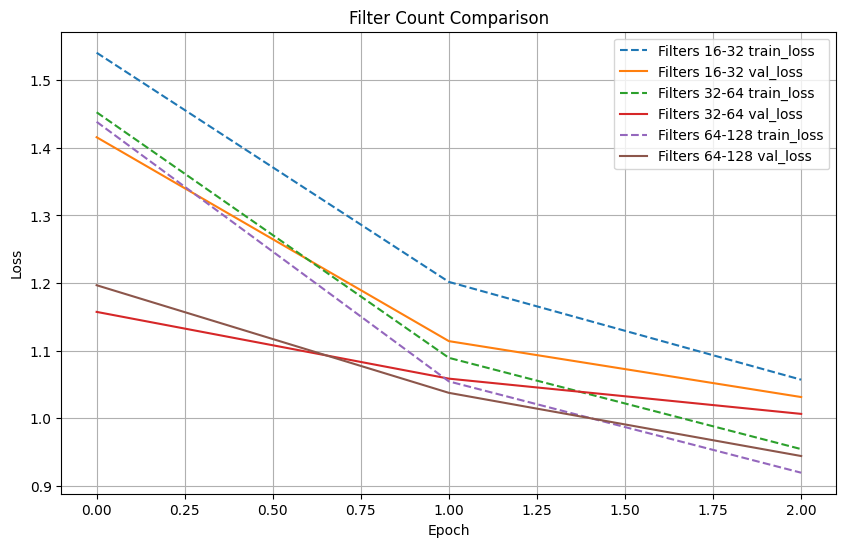

F1 Scores for Filters: {'16-32': 0.6435037942634423, '32-64': 0.6500545668008264, '64-128': 0.668080482772394}


In [53]:
filter_variants = [[16, 32], [32, 64], [64, 128]]
filter_labels = ['16-32', '32-64', '64-128']
histories_filters, f1_filters = [], []

for filters, label in zip(filter_variants, filter_labels):
    model = build_model(conv_layers=2, filters=filters)
    history, f1 = train_and_evaluate(model)
    histories_filters.append(history)
    f1_filters.append(f1)
    model.save(f'cnn_filters_{label}.h5')

plot_loss(histories_filters, [f"Filters {label}" for label in filter_labels], "Filter Count Comparison")
print("F1 Scores for Filters:", dict(zip(filter_labels, f1_filters)))

In [ ]:
kernel_sizes = [3, 5, 7]
histories_kernels, f1_kernels = [], []

for k in kernel_sizes:
    model = build_model(conv_layers=2, filters=[32, 64], kernel_size=k)
    history, f1 = train_and_evaluate(model)
    histories_kernels.append(history)
    f1_kernels.append(f1)
    model.save(f'cnn_kernel_{k}.h5')

plot_loss(histories_kernels, [f"Kernel {k}x{k}" for k in kernel_sizes], "Kernel Size Comparison")
print("F1 Scores for Kernels:", dict(zip(kernel_sizes, f1_kernels)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


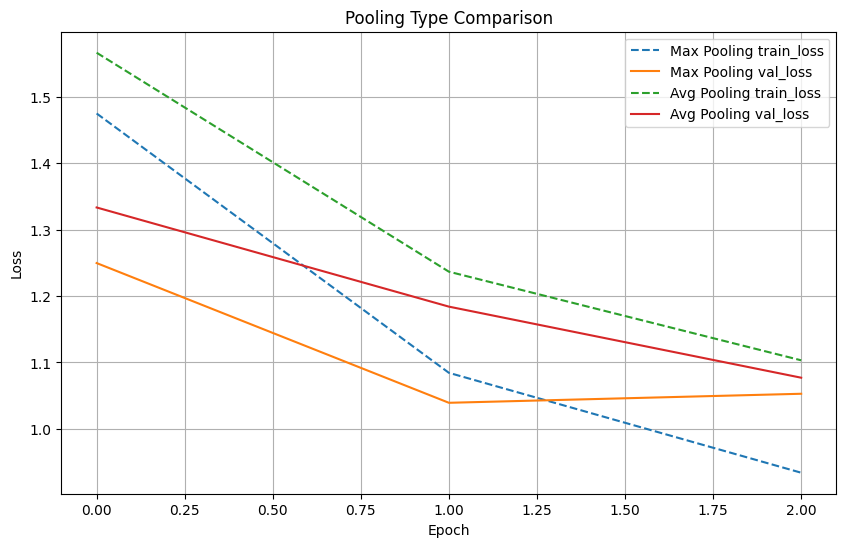

F1 Scores for Pooling: {'max': 0.6402546731302078, 'avg': 0.6165112577860825}


In [51]:
pool_types = ['max', 'avg']
histories_pools, f1_pools = [], []

for p in pool_types:
    model = build_model(conv_layers=2, filters=[32, 64], pooling=p)
    history, f1 = train_and_evaluate(model)
    histories_pools.append(history)
    f1_pools.append(f1)
    model.save(f'cnn_pooling_{p}.h5')

plot_loss(histories_pools, [f"{p.title()} Pooling" for p in pool_types], "Pooling Type Comparison")
print("F1 Scores for Pooling:", dict(zip(pool_types, f1_pools)))


In [55]:
import os
from CNN import evaluate_scratch_model
import h5py
def explore_h5_structure(path):
    def print_attrs(name, obj):
        print(name)
    with h5py.File(path, 'r') as f:
        f.visititems(print_attrs)

layer_variants = [1, 2, 3]
filter_labels = ['16-32', '32-64', '64-128']
kernel_sizes = [3, 5]
pool_types = ['max', 'avg']


results = {}


for layers in layer_variants:
    fname = f'cnn_conv_layers_{layers}.h5'
    explore_h5_structure(fname)
    if os.path.exists(fname):
        f1 = evaluate_scratch_model(fname, pooling='max')
        results[f"{layers} Conv Layers"] = f1


for label in filter_labels:
    fname = f'cnn_filters_{label}.h5'
    if os.path.exists(fname):
        f1 = evaluate_scratch_model(fname, pooling='max')
        results[f"Filters {label}"] = f1


for k in kernel_sizes:
    fname = f'cnn_kernel_{k}.h5'
    if os.path.exists(fname):
        f1 = evaluate_scratch_model(fname, pooling='max')
        results[f"Kernel {k}x{k}"] = f1


for p in pool_types:
    fname = f'cnn_pooling_{p}.h5'
    if os.path.exists(fname):
        f1 = evaluate_scratch_model(fname, pooling=p)
        results[f"{p.title()} Pooling"] = f1


print("CNN-from-Scratch Macro F1-Scores:")
for name, f1 in results.items():
    print(f"{name:25s}: {f1:.4f}")

model_weights
model_weights/conv1
model_weights/conv1/sequential_46
model_weights/conv1/sequential_46/conv1
model_weights/conv1/sequential_46/conv1/bias
model_weights/conv1/sequential_46/conv1/kernel
model_weights/dense1
model_weights/dense1/sequential_46
model_weights/dense1/sequential_46/dense1
model_weights/dense1/sequential_46/dense1/bias
model_weights/dense1/sequential_46/dense1/kernel
model_weights/flatten
model_weights/output
model_weights/output/sequential_46
model_weights/output/sequential_46/output
model_weights/output/sequential_46/output/bias
model_weights/output/sequential_46/output/kernel
model_weights/pool1
model_weights/top_level_model_weights
optimizer_weights
optimizer_weights/adam
optimizer_weights/adam/iteration
optimizer_weights/adam/learning_rate
optimizer_weights/adam/sequential_46_conv1_bias_momentum
optimizer_weights/adam/sequential_46_conv1_bias_velocity
optimizer_weights/adam/sequential_46_conv1_kernel_momentum
optimizer_weights/adam/sequential_46_conv1_kerne

KeyError: "Unable to synchronously open object (object 'dense1' doesn't exist)"